In [1]:
import datetime
import os
import os.path

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, TH, FR, SA
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
files = ['chest.csv', 'back.csv', 'shoulder.csv', 'arm.csv', 'leg.csv']
weekdays = [MO, TU, TH, FR, SA]
file_to_weekdays = dict(zip(files, weekdays))

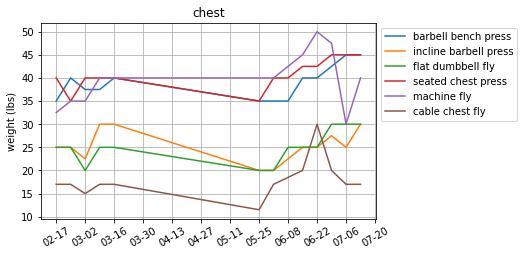

In [3]:
def show_in_single_figure(file):
    locator = mdates.WeekdayLocator(file_to_weekdays[file], interval=2)
    formatter = mdates.DateFormatter('%m-%d')
    
    # clean the data
    data = pd.read_csv(os.path.join('data', file), index_col=0,
                       dtype=np.float32, parse_dates=True)
    ax = data.plot()
    
    # change the look
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1, 1))
    title = file[:file.index('.')]
    ax.set_title(title)
    ax.get_xaxis().set_major_locator(locator)
    ax.get_xaxis().set_major_formatter(formatter)
    ax.set_ylabel('weight (lbs)')
    plt.gcf().autofmt_xdate(ha='center')
    
    # save and show the figure
#     plt.savefig(os.path.join('figures', title), bbox_inches='tight')
    plt.show()

show_in_single_figure('chest.csv')

In [4]:
def subplots_broken(data, weekday, fig=None, gs_ij=None):
    # create the axes based on the density of data
    start = list(data.index.month).index(5)
    start_ratio = start / len(data.index)
    gridspec_kw = dict(width_ratios=[start_ratio, 1 - start_ratio], wspace=0.1)
    
    if fig and gs_ij:
        subgs = gs_ij.subgridspec(1, 2, **gridspec_kw)
        ax0 = fig.add_subplot(subgs[0, 0])
        ax1 = fig.add_subplot(subgs[0, 1])
    else:
        fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, gridspec_kw=gridspec_kw)

    #adjust the axes so that they are broken
    delta = datetime.timedelta(days=1)
    ax0.set_xlim(data.index[0], data.index[start - 1] + delta)
    ax1.set_xlim(data.index[start] - delta, data.index[-1])

    # add broken symbols
    fontdict = dict(fontsize=15, fontweight='normal', rotation=-10, ha='center', va='center')
    fig.text(1, 1, '/', fontdict=fontdict, transform=ax0.transAxes)
    fig.text(1, 0, '/', fontdict=fontdict, transform=ax0.transAxes)
    fig.text(0, 1, '/', fontdict=fontdict, transform=ax1.transAxes)
    fig.text(0, 0, '/', fontdict=fontdict, transform=ax1.transAxes)

    # hide spines
    ax0.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    # set the locators and formatters
    formatter = mdates.DateFormatter('%m-%d')

    locator = mdates.WeekdayLocator(byweekday=weekday)
    ax0.get_xaxis().set_major_locator(locator)
    ax0.get_xaxis().set_major_formatter(formatter)

    locator = mdates.WeekdayLocator(byweekday=weekday)
    ax1.get_xaxis().set_major_locator(locator)
    ax1.get_xaxis().set_major_formatter(formatter)

    # add texts
    ax0.set_ylabel('weight (lbs)')
    ax1.yaxis.tick_right()
    return fig, ax0, ax1

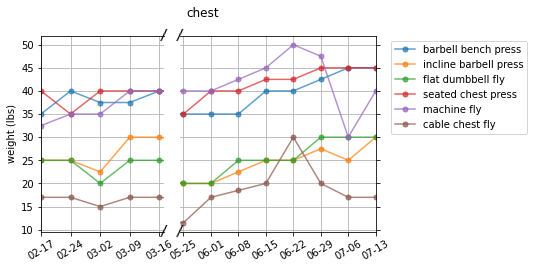

In [5]:
def show_in_single_figure_broken(file):
    data = pd.read_csv(os.path.join('data', file), index_col=0,
                   dtype=np.float32, parse_dates=True)
    fig, ax0, ax1 = subplots_broken(data, file_to_weekdays[file])

    # plot the data
    data.plot(ax=ax0, marker='o', markersize=5, alpha=0.7, legend=False)
    data.plot(ax=ax1, marker='o', markersize=5, alpha=0.7)

    # more adjustments
    ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    fig.autofmt_xdate(ha='center')
    fig.suptitle(file[:file.index('.')])
    ax0.grid(True)
    ax1.grid(True)
    
    # save and show the figure
    plt.savefig(os.path.join('figures', file[:file.index('.')]), bbox_inches='tight')
    plt.show()

show_in_single_figure_broken('chest.csv')

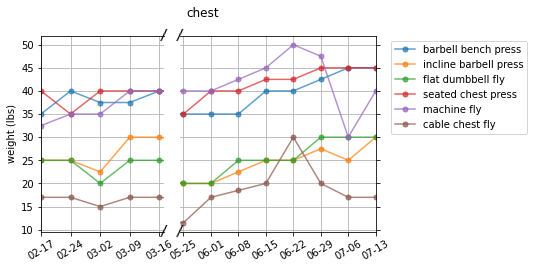

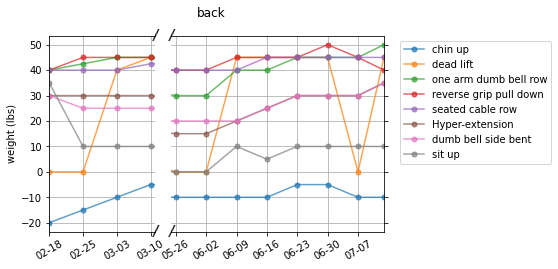

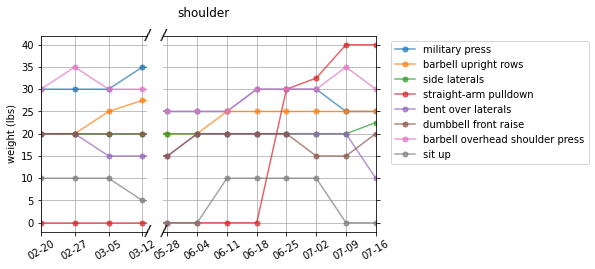

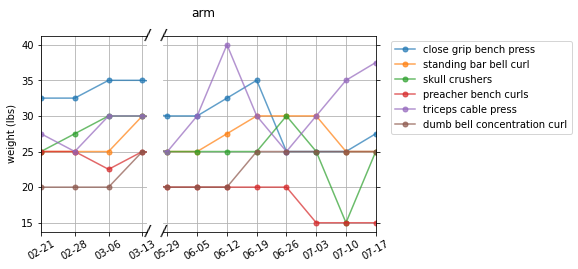

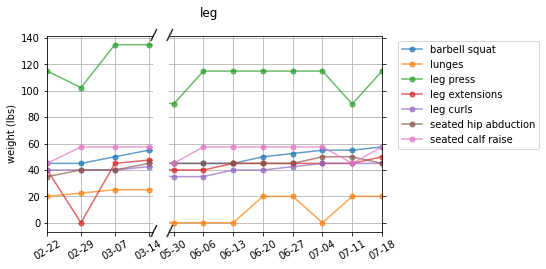

In [6]:
for file in files:
    show_in_single_figure_broken(file)

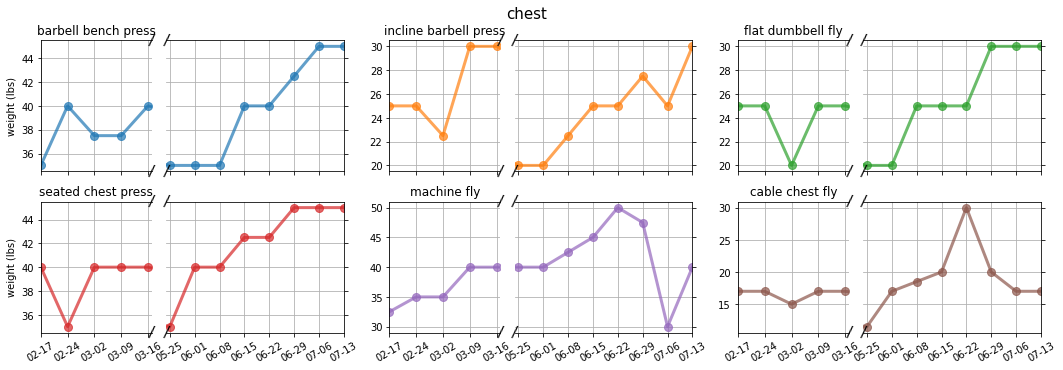

In [7]:
colors = list(mcolors.TABLEAU_COLORS.keys())
line_prop = dict(lw=3, alpha=0.7, marker='o', markersize=8)

def show_in_figures_broken(file, line_prop=line_prop):
    data = pd.read_csv(os.path.join('data', file), index_col=0,
                   dtype=np.float32, parse_dates=True)
    moves = data.columns
    rows = 3 if len(moves) > 6 else 2
    size = (15, 7.5) if len(moves) > 6 else (15, 5)

    fig = plt.figure(figsize=size)
    gs = fig.add_gridspec(rows, 3)

    for i in range(rows):
        for j in range(3):
            grid = i * 3 + j
            if grid >= len(moves):
                break
            _, ax0, ax1 = subplots_broken(data, file_to_weekdays[file], fig, gs[i ,j])
            move = moves[grid]
            color = colors[grid]
            data[move].plot(ax=ax0, color=color, **line_prop)
            data[move].plot(ax=ax1, color=color, **line_prop)

            ax1.set_yticklabels([])
            ax0.set_title(move)
            ax0.grid(True)
            ax1.grid(True)
            
            # remove repetitive texts
            if grid < len(moves) - 3:
                ax0.set_xticklabels([])
                ax1.set_xticklabels([])
            if grid % 3:
                ax0.set_ylabel('')
    fig.autofmt_xdate(ha='center')
    fig.suptitle(file[:file.index('.')], y=1.02, fontsize=15)
    fig.tight_layout()
    
    # save and show the figure
    plt.savefig(os.path.join('figures', file[:file.index('.')] + '_individual'), bbox_inches='tight')
    plt.show()
    
show_in_figures_broken('chest.csv')

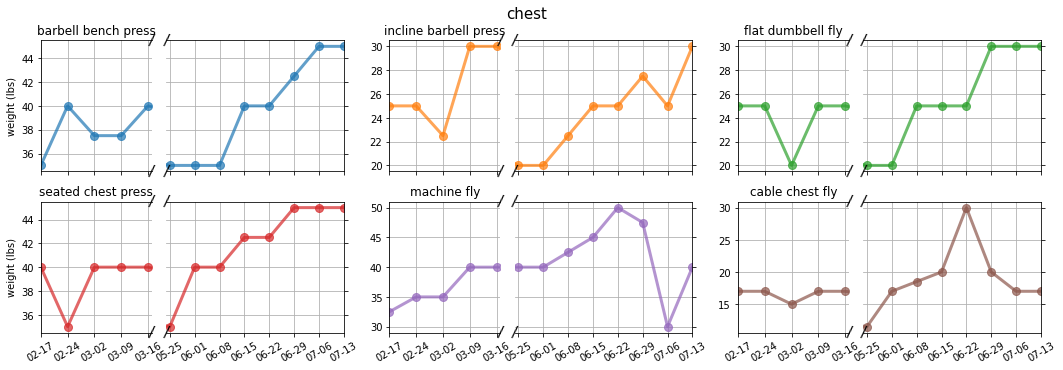

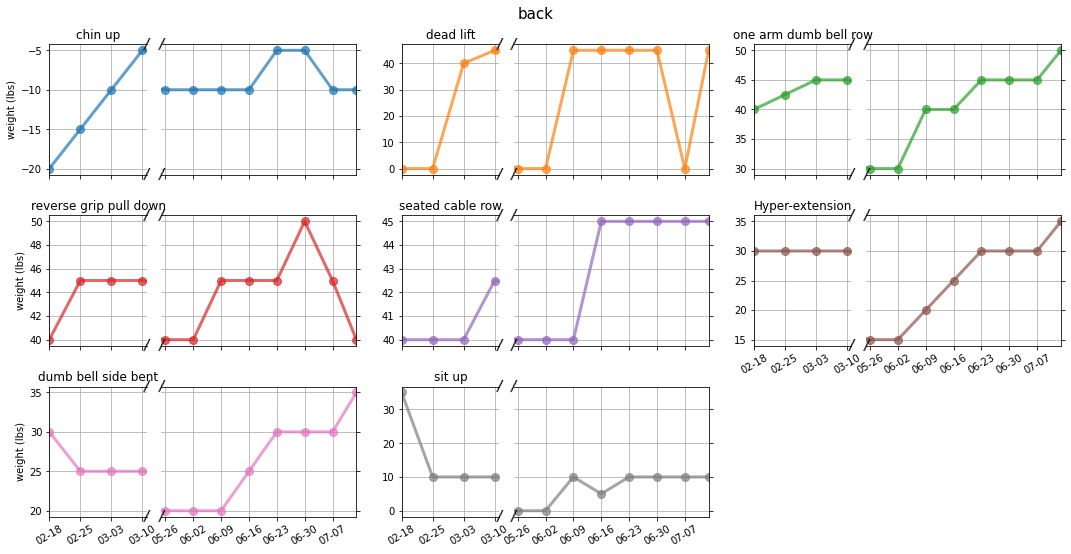

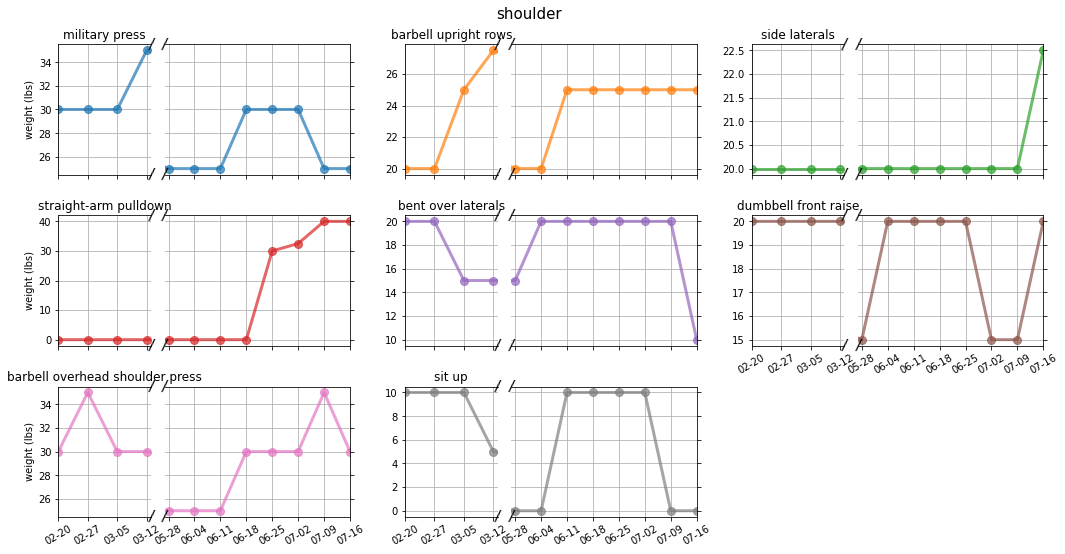

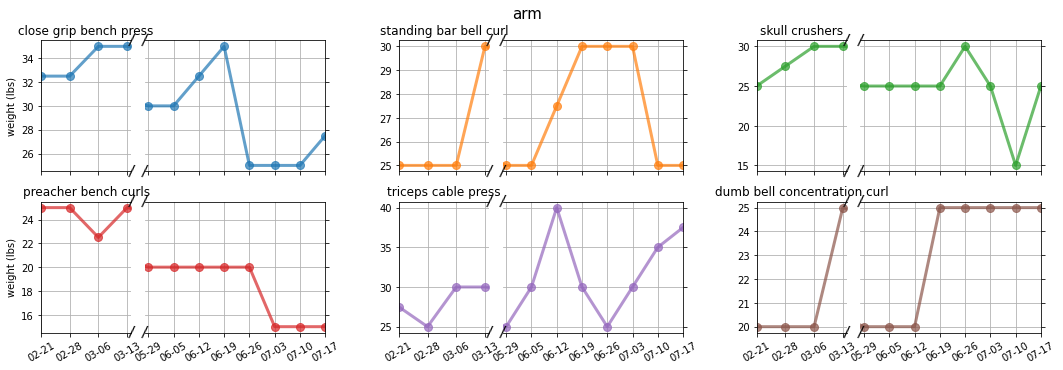

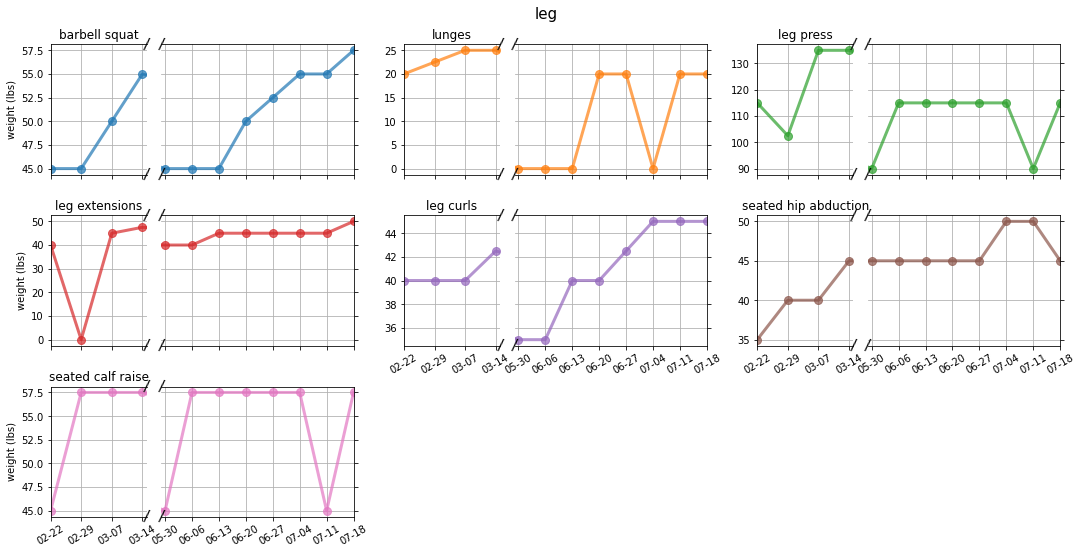

In [8]:
for file in files:
    show_in_figures_broken(file)